<a href="https://colab.research.google.com/github/DvnOshin/Fake-News-Detection-using-Sentiment-Analysis/blob/main/Fake_News_Detection_using_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRE-PROCESSING

In [ ]:
#IMPORTING LIBRARIES

# used for handling the dataset
import pandas as pd  

# used for handeling numbers/ working with arrays
import numpy as np 

# mathematical extension for NumPy library/ pyplot for plotting
import matplotlib.pyplot as plt  

# predominantly used for making statistical graphics
import seaborn as sns 

# Transforms text to feature vectors that can be used as input to estimator.
from sklearn.feature_extraction.text import TfidfVectorizer 

# calculates the accuracy score for a set of predicted labels against the true labels. 
from sklearn.metrics import accuracy_score
 
# evaluate the accuracy of a classification
from sklearn.metrics import confusion_matrix

# split into training and test datasets
from sklearn.model_selection import train_test_split


In [ ]:
# IMPORTING DATASET (FROM GOOGLE DRIVE)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# READING THE CSV FILE
data_fake = pd.read_csv("/content/drive/MyDrive/Dataset_FakeNews/Fake.csv")
data_true = pd.read_csv("/content/drive/MyDrive/Dataset_FakeNews/True.csv")

In [ ]:
# ADDING COLUMN TO CATEGORIZE FAKE AND REAL DATA
data_fake['Sentiment'] = 0
data_true['Sentiment'] = 1

In [ ]:
print(data_fake.shape)
print(data_true.shape)

(23481, 5)
(21417, 5)


In [ ]:
# COMBINING THE TWO DATASETS
df = pd.concat([data_fake, data_true])
df.shape

(44898, 5)

In [ ]:
# DISPLAYING RANDOM ITEMS
df.sample(5)

,title,text,subject,date,Sentiment
7066,WATCH: Trump Says That Women Actually ‘Like’ ...,Donald Trump has said many degrading and reduc...,News,"April 6, 2016",0
15992,WHY TRUMP’S DOJ Gets Asian Support in Fight Ag...,Have you ever heard of the bamboo ceiling ? T...,Government News,"Aug 3, 2017",0
2408,N.J. Governor Chris Christie accosts heckler i...,NEW YORK (Reuters) - New Jersey Governor Chris...,politicsNews,"July 31, 2017",1
5754,U.S. judge orders Trump administration to allo...,LOS ANGELES/NEW YORK (Reuters) - A federal jud...,politicsNews,"February 2, 2017",1
6211,"Supreme Court Gives A Big ‘F You’ To GOP, Rej...",The Supreme Court did something amazing on Mon...,News,"May 23, 2016",0


In [ ]:
# RETURN THE NUMBER OF MISSING VALUES IN THE DATASET
df.isnull().sum()

title        0
text         0
subject      0
date         0
Sentiment    0
dtype: int64

#VISUALIZATION BEFORE CLEANING

0    23481
1    21417
Name: Sentiment, dtype: int64


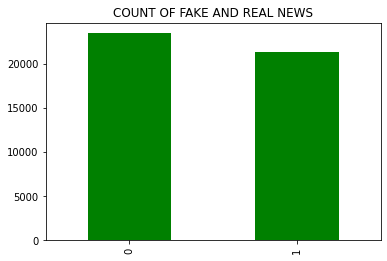

In [ ]:
# COUNT OF REAL AND FAKE DATA
print(df['Sentiment'].value_counts())

# PLOTTING
df['Sentiment'].value_counts().plot(kind='bar', color = 'green')
plt.title("COUNT OF FAKE AND REAL NEWS")
plt.show()

In [ ]:
#TYPES OF SUBJECT IN THE DATASET
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

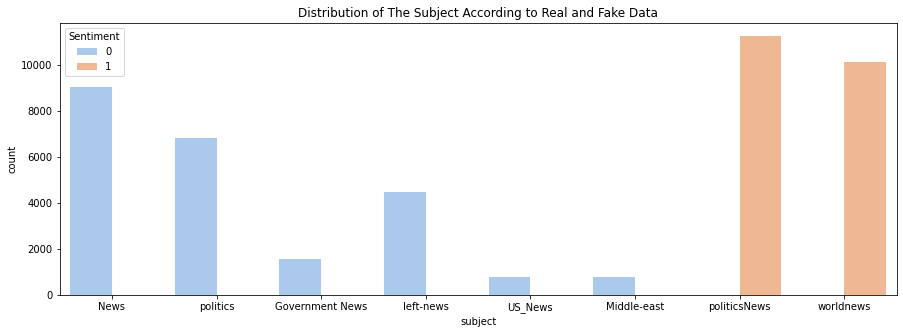

In [ ]:
# PLOTTING THE SUBJECTS IN FORM OF GRAPH

plt.figure(figsize=(15, 5))
ax = sns.countplot(x="subject",  hue='Sentiment', data=df, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

#DATA CLEANING

In [ ]:
df.shape

(44898, 5)

In [ ]:
# DROPPING DUPLICATE ITEMS
df.drop_duplicates(subset="title", inplace=True)

In [ ]:
df.shape

(38729, 5)

In [ ]:
# Working with NLP (provides various text processing libraries with a lot of test datasets)
import nltk 

# check if a particular string matches a given regular expression
import re 


# NLTK libraries
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop = set(stopwords.words('english'))
print(len(stop))

def clean(text):
  text_token = word_tokenize(text)
  filtered_text = ' '.join([w.lower() for w in text_token if w.lower() not in stop and len(w) > 2])
  filtered_text = filtered_text.replace(r"[^a-zA-Z]+", '')  # replace all non-single lettered words with ''
  text_only = re.sub(r'\b\d+\b', '', filtered_text)
  clean_text = text_only.replace(',', '').replace('.', '').replace(':', '')
  return clean_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


179


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# REMOVING IRRELEVANT OBSERVATIONS OF THE DATASET
df['text'] = df['title']+df['text']
df.drop(labels=['title','subject','date'], axis = 1, inplace= True)

In [ ]:
df.head(1)

,text,Sentiment
0,Donald Trump Sends Out Embarrassing New Year’...,0


In [ ]:
df['text'] = [clean(x) for x in df['text']]

In [ ]:
df.head(1)

,text,Sentiment
0,donald trump sends embarrassing new year eve m...,0


#VISUALIZATION

Sentiment
0    17903
1    20826
Name: text, dtype: int64


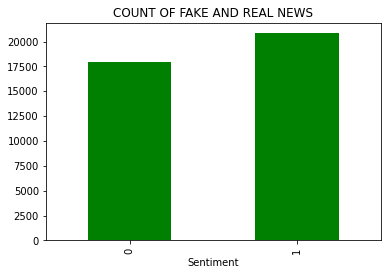

In [ ]:
# How many fake and real articles?
print(df.groupby(['Sentiment'])['text'].count())
df.groupby(['Sentiment'])['text'].count().plot(kind="bar",color = 'green')
plt.title("COUNT OF FAKE AND REAL NEWS")
plt.show()

A word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

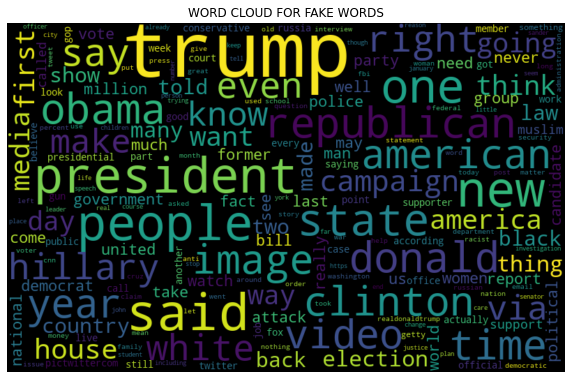

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = df[df["Sentiment"] == 0]
fake_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110, collocations = False).generate(fake_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WORD CLOUD FOR FAKE WORDS")
plt.axis("off")
plt.show()

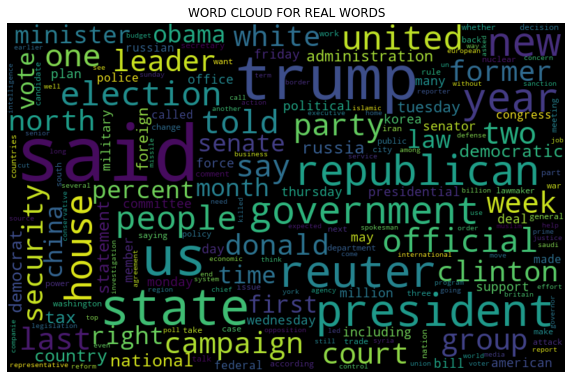

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = df[df["Sentiment"] == 1]
real_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(real_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WORD CLOUD FOR REAL WORDS")
plt.axis("off")
plt.show()

#SPLITTING INTO TEST AND TRAIN DATASET

In [ ]:
X = df['text'].values
Y = df['Sentiment'].values

In [ ]:
# Convert the text to numerical data using Vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(X,Y, test_size = 0.25, random_state =0 )

In [ ]:
train_data

<29046x198914 sparse matrix of type '<class 'numpy.float64'>'
	with 4761622 stored elements in Compressed Sparse Row format>

In [ ]:
test_data

<9683x198914 sparse matrix of type '<class 'numpy.float64'>'
	with 1565315 stored elements in Compressed Sparse Row format>

In [ ]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

#MACHINE LEARNING ALGORITHMS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

LOGISTIC REGRESSION

In [ ]:
ml_model = LogisticRegression()

# Fit & Train our data
ml_model.fit(train_data, train_labels)

# Check for Accuracy (Train Data)
X_train_predict = ml_model.predict(train_data)
train_data_accuracy = accuracy_score(X_train_predict, train_labels)
percent_tr_accuracy = train_data_accuracy * 100
print("Accuracy for Train data: ", percent_tr_accuracy)

# Check for Accuracy (Test Data)
X_test_predict = ml_model.predict(test_data)
test_data_accuracy = accuracy_score(X_test_predict, test_labels)
percent_ts_accuracy = test_data_accuracy * 100
print("Accuracy for Test data: ", percent_ts_accuracy)

Accuracy for Train data:  99.16683880740894
Accuracy for Test data:  98.45089331818652


Confusion matrix, without normalization


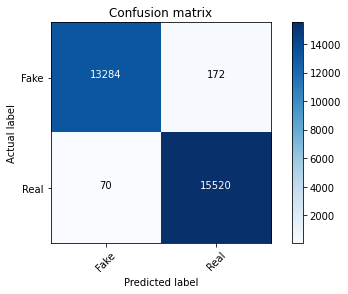

In [ ]:
cm = metrics.confusion_matrix(train_labels, X_train_predict)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

NAIVE BAYES

In [ ]:
ml_model2 = MultinomialNB()

# Fit & Train our data
ml_model2.fit(train_data, train_labels)

# Check for Accuracy (Train Data)
X_train_predict2 = ml_model2.predict(train_data)
train_data_accuracy2 = accuracy_score(X_train_predict2, train_labels)
percent_tr_accuracy2 = train_data_accuracy2 * 100
print("Accuracy for Train data: ", percent_tr_accuracy2)

# Check for Accuracy (Test Data)
X_test_predict2 = ml_model2.predict(test_data)
test_data_accuracy2 = accuracy_score(X_test_predict2, test_labels)
percent_ts_accuracy2 = test_data_accuracy2 * 100
print("Accuracy for Test data: ", percent_ts_accuracy2)

Accuracy for Train data:  94.28492735660676
Accuracy for Test data:  93.31818651244448


Confusion matrix, without normalization


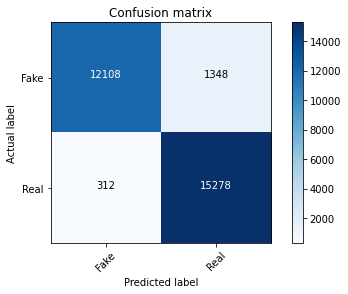

In [ ]:
cm2 = metrics.confusion_matrix(train_labels, X_train_predict2)
plot_confusion_matrix(cm2, classes=['Fake', 'Real'])

DECISION TREE CLASSIFIER

In [ ]:
ml_model3 = DecisionTreeClassifier()

# Fit & Train our data

ml_model3.fit(train_data, train_labels)

# Check for Accuracy (Train Data)

X_train_predict3 = ml_model3.predict(train_data)
train_data_accuracy3 = accuracy_score(X_train_predict3, train_labels)
percent_tr_accuracy3 = train_data_accuracy3 * 100
print("Accuracy for Train data: ", percent_tr_accuracy3)

# Check for Accuracy (Test Data)
X_test_predict3 = ml_model3.predict(test_data)
test_data_accuracy3 = accuracy_score(X_test_predict3, test_labels)
percent_ts_accuracy3 = test_data_accuracy3 * 100
print("Accuracy for Test data: ", percent_ts_accuracy3)

Accuracy for Train data:  100.0
Accuracy for Test data:  99.49395848394093


Confusion matrix, without normalization


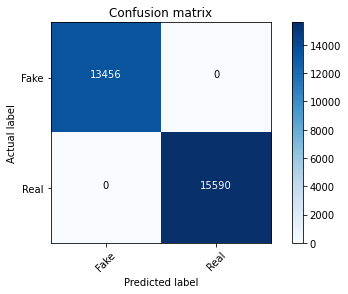

In [ ]:
cm3 = metrics.confusion_matrix(train_labels, X_train_predict3)
plot_confusion_matrix(cm3, classes=['Fake', 'Real'])

RANDOM FOREST CLASSIFIER

In [ ]:
ml_model4 = RandomForestClassifier()

# Fit & Train our data

ml_model4.fit(train_data, train_labels)

# Check for Accuracy (Train Data)

X_train_predict4 = ml_model4.predict(train_data)
train_data_accuracy4 = accuracy_score(X_train_predict4, train_labels)
percent_tr_accuracy4 = train_data_accuracy4 * 100
print("Accuracy for Train data: ", percent_tr_accuracy4)

# Check for Accuracy (Test Data)
X_test_predict4 = ml_model4.predict(test_data)
test_data_accuracy4 = accuracy_score(X_test_predict4, test_labels)
percent_ts_accuracy4 = test_data_accuracy4 * 100
print("Accuracy for Test data: ", percent_ts_accuracy4)

Accuracy for Train data:  100.0
Accuracy for Test data:  98.31663740576268


Confusion matrix, without normalization


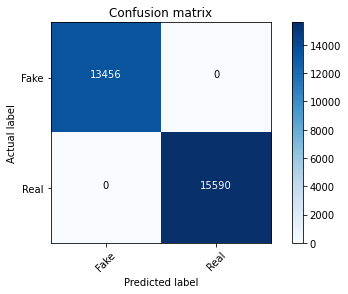

In [ ]:
cm4 = metrics.confusion_matrix(train_labels, X_train_predict4)
plot_confusion_matrix(cm4, classes=['Fake', 'Real'])

In [ ]:
#ALL ML ALGORITHMS RESULT 
score_1 = accuracy_score(train_labels,X_train_predict)
score_2 = accuracy_score(train_labels,X_train_predict2)
score_3 = accuracy_score(train_labels,X_train_predict3)
score_4 = accuracy_score(train_labels,X_train_predict4)

score_11 = accuracy_score(test_labels,X_test_predict)
score_12 = accuracy_score(test_labels,X_test_predict2)
score_13 = accuracy_score(test_labels,X_test_predict3)
score_14 = accuracy_score(test_labels,X_test_predict4)
 
result = pd.DataFrame([["Logistic Regression",score_1,score_11],
                        ["Naive Bayes",score_2,score_12],
                        ["Decision Tree",score_3,score_13],
                       ["Random Forest",score_4,score_14]])
result.columns =['ML Algorithm', 'Train Dataset', 'Test Dataset']
result

,ML Algorithm,Train Dataset,Test Dataset
0,Logistic Regression,0.991668,0.984509
1,Naive Bayes,0.942849,0.933182
2,Decision Tree,1.000000,0.994940
3,Random Forest,1.000000,0.983166


In [ ]:
result  = result.set_index("ML Algorithm")

Text(0, 0.5, 'Accuracy')

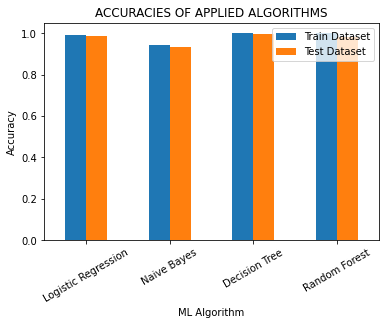

In [ ]:
result.plot(kind='bar')

plt.xticks(rotation = 30, horizontalalignment = 'center')
plt.title("ACCURACIES OF APPLIED ALGORITHMS")
plt.xlabel('ML Algorithm')
plt.ylabel("Accuracy")

In [ ]:
print("Fake News Detection System")
def fakenewsdetection():
     
    sample = input("Enter Any News Headline: ")
    data = vectorizer.transform([sample]).toarray()
    a = ml_model3.predict(data)
    if a==1:
      print("This is a Real news.")
    else:
      print("This is a Fake news.")
fakenewsdetection()

Fake News Detection System
Enter Any News Headline: By Catherine J. Frompovich Marvin Herndon, PhD, published another paper regarding global climate issues and ethics wherein he challenges the scientific community “to come clean” regarding their research, journals and ethics relative to weather science, which has garnered many titles: climate change, global warming, weather geoengineering, solar radiation management and who knows what it will become next in apparent attempts to confuse an awakening global population as to what’s been going on with geoengineered weather. Source Dr. Herndon’s paper “An Open Letter to Members of AGU, EGU, and IPCC Alleging Promotion of Fake Science at the Expense of Human and Environmental Health and Comments on AGU Draft Geoengineering Position Statement” was published in the New Concepts in Global Tectonics Journal, v. 5, no. 3, September 2017. www.ncgtjournal.com. Dr. Herndon believes “Scientists are persons of integrity: They stand for what is right. 